# **Experiment Notebook**



---
## Setup Environment

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT1",
)
at.run()

import warnings
warnings.simplefilter(action='ignore')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
Mounted at /content/gdrive

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT1/data


---
## Student Information


In [ ]:
# <Student to fill this section and then remove this comment>
student_name = "Parisasadat Kalaki"
student_id = "25969686"

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h1", key='student_name', value=student_name)

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h1", key='student_id', value=student_id)

---
## 0. Python Packages

### 0.a Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade "vl-convert-python>=1.6.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 40.8 MB/s eta 0:00:00


In [ ]:
!pip install "vegafusion[embed]>=1.5.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 89.6 MB/s eta 0:00:00


### 0.b Import Packages

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
alt.data_transformers.enable("vegafusion")


DataTransformerRegistry.enable('vegafusion')

---
## A. Project Description


In [ ]:
# <Student to fill this section and then remove this comment>

business_objective = """
The goal of this project is to build regression models that predict the insurance premium paid by motor vehicle insurance customers.

For the business, this has several key purposes:

1. Pricing Automation:
   Accurate premium predictions allow the company to automatically generate fair and competitive quotes for new customers, reducing manual work for agents and brokers.

2. Revenue Forecasting:
   By predicting premiums across the customer base, the company can estimate total expected income, supporting financial planning and budgeting.

3. Customer Retention & Satisfaction:
   Offering consistent and fair premiums increases trust and helps retain customers, as mispriced policies (too high or too low) can lead to dissatisfaction or loss of customers.

Impact of Accurate Results:
- Customers get fair prices, which improves satisfaction and competitiveness.
- The company can maximize profitability by avoiding underpricing risky customers and overpricing safe customers.
- Internal teams (sales, actuarial, finance) can make better business decisions based on reliable premium forecasts.

Impact of Incorrect Results:
- Overestimated premiums: Customers may reject quotes, leading to lost business and reduced market share.
- Underestimated premiums: The company takes on too much risk without enough revenue to cover claims, which harms profitability.
- Unfair pricing patterns: If the model learns biased relationships (e.g., based on demographics), it could cause reputation damage or regulatory issues.
"""


In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='business_objective', value=business_objective)

---
## B. Dataset Understanding (Global Interpretation)

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
# Load training data
try:
  training_df = pd.read_csv(at.folder_path / "car_insurance_premium_training.csv")
  validation_df = pd.read_csv(at.folder_path / "car_insurance_premium_validation.csv")
  testing_df = pd.read_csv(at.folder_path / "car_insurance_premium_testing.csv")
except Exception as e:
  print(e)

### B.1 Explore Training Set


> You can add more cells in this section

In [ ]:
training_df.head()

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,...,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_fuel_type,vehicle_length,vehicle_weight
0,2f4cea69-3806-41b7-b7c2-6039eaac8fae,Mr.,John,Medina,m,1970-12-24,2004-12-21,+61 402 336 520,juanatkinson@example.com,Unit 07,...,3,0,2006,88,1386,14600.0,3,P,3.719,998
1,c738e8cb-13fe-43f9-8d59-b501b04ff590,Dr.,Krystal,Howard,f,1989-02-07,2008-02-20,0412-996-143,mossapril@example.net,Suite 015,...,1,0,2014,115,847,9799.0,0,P,NaN,193
2,685c81d7-b1de-4862-902e-f57612dedb57,Mr.,Jeffrey,Craig,m,1972-08-29,2001-12-08,0790583464,juliamcdaniel@example.org,596/,...,3,1,2001,75,1360,14760.0,5,P,4.188,1116
3,643be7d5-6ffa-4517-8468-85bfe5e01bde,Mr.,Gregory,Ortiz,m,1983-01-01,2013-09-25,(03) 9638 9041,ncoleman@example.com,Level 7,...,3,0,2001,90,1753,17480.0,4,D,4.382,1213
4,99c498eb-33de-479b-88ec-b5b9d6d5252b,Mr.,Donald,Harrison,m,1960-07-16,1999-06-30,+61-2-6857-3943,parksashley@example.com,8/,...,3,0,1999,90,1997,17805.0,5,D,4.188,1200


In [ ]:
training_df.tail()

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,...,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_fuel_type,vehicle_length,vehicle_weight
32131,288e0a4f-885e-40f6-ba06-e1bf9cbb0fa4,NaN,April,Miller,u,1994-11-18,2013-01-04,+61.7.1575.2689,brandontaylor@example.com,9/,...,3,0,2004,90,1360,13410.00,3,P,3.822,1038
32132,983f5609-fc77-41ea-9561-6b7e0485aafa,Dr.,Marco,Garcia,m,1979-06-24,1998-02-20,+61-7-4131-9289,ghill@example.net,6/,...,3,1,2006,86,1461,19220.00,3,D,4.295,1205
32133,48ef3bf6-4a34-4b13-9af3-f6c72d34f4c0,NaN,Aayush,Iyengar,u,1995-03-21,2018-12-17,+61 7 7449 6734,qwilson@example.com,Level 9,...,3,0,2005,75,1390,11390.00,3,P,3.828,1018
32134,9397b483-359f-473f-bbc5-70c51047a595,NaN,Diane,Andrade,u,1963-09-10,1985-06-15,27029962,paguilar@example.com,6/,...,3,0,2013,90,1396,17790.00,5,D,4.300,1205
32135,9f3f732c-8e78-4356-8a15-6677a9a03d84,Mr.,Keith,Ramirez,m,1980-05-05,1998-07-17,+61-8-8432-2782,ydavis@example.org,Unit 58,...,3,1,1981,75,1716,10577.81,5,P,3.551,1035


In [ ]:
print(training_df.shape)

(32136, 40)


In [ ]:
training_df.describe()

,building_number,seniority,current_policies_held,max_policies_held,max_products_held,lapsed_policies,payment_method,net_premium_amount,total_claims_cost_in_current_year,total_claims_number_in_current_year,...,total_claims_number_ratio,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_length,vehicle_weight
count,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,...,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,31451.000000,32136.000000
mean,185.629792,5.896596,1.443055,1.796023,1.048015,0.391804,0.361433,579.367438,104.826855,0.206622,...,0.463897,2.839806,0.119461,2004.573376,97.543409,1717.529842,18972.391870,4.404998,4.251559,1252.991349
std,280.506483,5.909002,0.943590,1.157598,0.231683,0.550027,0.480423,44.991023,1110.840111,0.771437,...,0.774516,0.396159,0.324335,5.347809,28.174377,409.694777,7176.732691,0.976780,0.378661,274.112493
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,460.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1954.000000,0.000000,49.000000,270.460000,0.000000,2.500000,55.000000
25%,6.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,542.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2001.000000,75.000000,1461.000000,14093.730000,4.000000,4.015000,1089.000000
50%,45.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,575.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2004.000000,95.000000,1749.000000,18020.000000,5.000000,4.227000,1239.000000
75%,255.000000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,614.000000,0.000000,0.000000,...,0.660000,3.000000,0.000000,2007.000000,110.000000,1952.000000,22466.050000,5.000000,4.454000,1395.000000
max,999.000000,40.000000,17.000000,17.000000,4.000000,7.000000,1.000000,676.000000,128809.730000,15.000000,...,20.860000,3.000000,1.000000,2018.000000,340.000000,5654.000000,110000.000000,6.000000,8.218000,2725.000000


In [ ]:
training_df.describe(include='object')

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,street_name,street_suffix,suburb,contract_start_date,last_renewal_date,next_renewal_date,distribution_channel,lapsed_date,vehicle_fuel_type
count,32136,21345,32136,32116,32136,32136,32136,32136,32136,32136,32136,32136,32136,32136,32136,32136,32136,12567,32058
unique,32136,5,1321,2446,3,14183,11691,32136,30167,3270,27443,200,18887,4963,1117,1117,3,1200,2
top,9f3f732c-8e78-4356-8a15-6677a9a03d84,Mr.,Michael,Smith,u,1966-01-01,1996-01-01,+61-8-8432-2782,bsmith@example.net,7/,Michael Port,Tollway,South Robert,2023-12-01,2024-03-01,2025-03-01,0,2021-12-01,D
freq,1,7472,675,635,10791,38,34,1,10,420,8,194,24,76,230,230,15662,52,21450


In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32136 entries, 0 to 32135
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          32136 non-null  object 
 1   prefix                               21345 non-null  object 
 2   first_name                           32136 non-null  object 
 3   last_name                            32116 non-null  object 
 4   gender                               32136 non-null  object 
 5   birth_date                           32136 non-null  object 
 6   driving_license_date                 32136 non-null  object 
 7   phone_number                         32136 non-null  object 
 8   email                                32136 non-null  object 
 9   secondary_address                    32136 non-null  object 
 10  building_number                      32136 non-null  int64  
 11  street_name                 

In [ ]:
# checking duplicates
training_df.duplicated().sum()

np.int64(0)

In [ ]:
training_set_insights = """
There are 32,136 rows and 40 columns(features) in the training set.

Based on the describe() method,

1. seniority: Mean ≈ 5.9 years, max = 40 which shows most customers are relatively new, but some very long-term loyal ones exist.
2. current_policies_held: Mean ≈ 1.44, max = 17 that shows majority hold 1–2 policies but very few outliers with 10+ policies.
3. lapsed_policies: Mostly 0, but some up to 7 that shows lapsing is rare but important (indicates churn/risk).
4. payment_method: Binary (0=annual, 1=half-yearly) that shows About 36% use half-yearly (mean ≈ 0.36) and mojority pay annual.
5. total_claims_cost_in_current_year: Median = 0, Mean = 104, Max = 128,809 (!) that is extremely skewed: most customers make no claims, but a few have very large payouts.
6. total_claims_number_in_current_year: Median = 0, Mean = 0.2, Max = 15. Again, most have 0 claims, some heavy claimers.
7. total_claims_number_ratio: Mean ≈ 0.46, Max = 20.86. Outliers, people claiming every few months.
8. matriculation_year: Mean ≈ 2004, Min = 1954, Max = 2018. Most cars are 15–20 years old, some very old (1950s).
9. vehicle_horsepower: Mean ≈ 98 HP, Max = 340 HP. Normal for cars, few outliers with very high performance.
10. vehicle_cylinder: Range 49 → 5654 (!). Outliers exist (maybe errors or unusual trucks/machinery).
11. vehicle_value: Mean ≈ 18,972, Max = 110,000. Wide range: cheap cars to luxury vehicles.
12. vehicle_doors: Typically 4–5. Some 0 → possible data entry issue (motorbikes? missing?).
13. vehicle_length: Mean ≈ 4.25m, Max = 8.2m. 8m is abnormally long, probably trucks or data errors.
14. vehicle_weight: Mean ≈ 1,252 kg, Min = 55 kg (!), Max = 2,725. 55 kg is unrealistic → probably a data error.
15.  building_number is an identifier and not useful for predicting.

for object features:
1. These features are so specific and not predictive. (customer_id, first_name, last_name, prefix, phone_number, email, secondary_address, street_name,
street_suffix, suburb  → identifiers)
2. Transform into numeric features: birth_date → Age
   driving_license_date → Driving experience (years licensed)
   Contract dates → Policy duration / time since last renewal
3. Categorical to keep:
   gender (with care, many unknowns)
   distribution_channel
   vehicle_fuel_type

Based on the info() method,

1. Data Types: 21 numerical features, 19 categorical features
2. Target Variable: net_premium_amount
3. Missing Values:
   prefix → ~21k non-null (lots of missing, probably not important → drop).
   last_name → only 20 missing, could fill or drop column.
   lapsed_date →  ~12.5k non-null → expected, because most customers haven’t lapsed (so missing = still active). Could transform into a "is_lapsed" binary instead.
   vehicle_fuel_type → ~80 missing (minor, can impute).
   vehicle_length → ~600 missing (can impute mean/median).

"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='training_set_insights', value=training_set_insights)

### B.2 Explore Validation Set

> You can add more cells in this section

In [ ]:
validation_df.head()

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,...,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_fuel_type,vehicle_length,vehicle_weight
0,980657d0-843c-4006-abcb-aa6a44ad57f1,NaN,Veronica,Simpson,u,1982-08-12,2000-09-21,56009838,andrea96@example.com,Suite 649,...,4,0,1995,81,4525,42920.00,0,D,NaN,4525
1,f50db3af-dfae-496a-8aaf-14b0ea2729e2,Dr.,Carla,Riley,f,1976-12-09,1994-12-23,+61 479 194 344,rayala@example.net,33/,...,1,0,2015,30,278,5599.00,0,P,NaN,192
2,d32a95a8-3ed8-4a98-a54a-472dd480f6fa,NaN,Brian,Branch,u,1948-06-25,1970-04-11,(07).9637.5336,thomas81@example.net,Apt. 327,...,3,0,1970,25,998,6611.13,2,P,3.058,615
3,ba0d15a9-0792-44a2-87d3-05f45c1c046d,Dr.,Drew,Smith,m,1974-09-21,1994-09-21,02.4989.1186,martinstephanie@example.net,Suite 670,...,3,0,2004,87,1560,19120.00,5,P,4.276,1228
4,e0da2a4b-fa0f-4512-a363-780d1f8e2b0e,Mr.,Jose,Watson,m,1961-06-26,2014-08-01,(07).7515.5599,robinthompson@example.org,68/,...,1,0,2000,4,49,1899.00,0,P,NaN,78


In [ ]:
validation_df.tail()

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,...,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_fuel_type,vehicle_length,vehicle_weight
10695,9a43785c-ced2-422d-92c2-eb0d136bfb76,Dr.,Megan,Martin,f,1975-10-29,1995-10-10,0424 800 466,cynthiajohnson@example.net,9/,...,3,1,1998,60,1149,8594.47,3,P,3.430,820
10696,af15791c-7381-4e04-a97e-c545df090733,Mr.,Andrew,O'Connor,m,1971-07-07,1992-09-19,(07).3187.3584,don60@example.net,Suite 869,...,3,1,2000,70,1868,12620.00,5,D,3.822,1010
10697,2eafe0dd-567a-409d-bb06-bc10cf6e5341,Mr.,Douglas,Hamilton,m,1958-02-28,1982-04-06,0738948057,jasonbarnett@example.com,4/,...,3,0,2016,82,1397,21163.45,5,P,3.776,1060
10698,73983ce3-f1b6-42e2-9076-5b48de8a275a,Mrs.,Marie,Rowlands,f,1971-11-02,2018-01-01,+61-2-2859-6931,michaelsilva@example.net,Unit 10,...,3,0,2008,69,998,11706.00,5,P,3.595,840
10699,b775c1ec-3c31-40cf-9981-1d94c55befc8,NaN,Scott,Miller,u,1983-11-30,2013-10-10,(08) 5134 1281,lori44@example.com,Apt. 785,...,3,0,2017,99,1560,21650.00,5,D,4.329,1275


In [ ]:
validation_df.shape

(10700, 40)

In [ ]:
validation_df.describe()

,building_number,seniority,current_policies_held,max_policies_held,max_products_held,lapsed_policies,payment_method,net_premium_amount,total_claims_cost_in_current_year,total_claims_number_in_current_year,...,total_claims_number_ratio,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_length,vehicle_weight
count,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,...,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,7261.000000,10700.000000
mean,185.951776,6.120374,1.756449,2.082991,1.108411,0.315327,0.161682,489.297009,87.516426,0.156822,...,0.322316,2.387383,0.084766,2002.933271,70.655421,1296.187477,14177.850521,3.056822,4.151021,956.078411
std,280.713477,6.444548,1.268339,1.410385,0.336329,0.558235,0.368176,133.399129,2356.273613,0.659318,...,0.816566,0.929685,0.278547,9.513792,44.015785,867.199458,10079.413937,2.178017,0.374925,710.277947
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,309.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1950.000000,0.000000,49.000000,270.460000,0.000000,1.978000,43.000000
25%,6.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,396.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,2000.000000,34.000000,599.000000,6611.130000,0.000000,3.916000,200.000000
50%,44.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,479.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2004.000000,75.000000,1398.000000,13441.190000,4.000000,4.159000,1062.500000
75%,261.000000,8.000000,2.000000,3.000000,1.000000,1.000000,0.000000,500.000000,0.000000,0.000000,...,0.250000,3.000000,0.000000,2008.000000,100.000000,1868.000000,19379.000000,5.000000,4.350000,1275.000000
max,999.000000,39.000000,17.000000,17.000000,4.000000,6.000000,1.000000,868.000000,236285.180000,12.000000,...,26.070000,4.000000,1.000000,2018.000000,400.000000,6788.000000,155252.800000,6.000000,6.940000,7300.000000


In [ ]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          10700 non-null  object 
 1   prefix                               7078 non-null   object 
 2   first_name                           10700 non-null  object 
 3   last_name                            10696 non-null  object 
 4   gender                               10700 non-null  object 
 5   birth_date                           10700 non-null  object 
 6   driving_license_date                 10700 non-null  object 
 7   phone_number                         10700 non-null  object 
 8   email                                10700 non-null  object 
 9   secondary_address                    10700 non-null  object 
 10  building_number                      10700 non-null  int64  
 11  street_name                 

In [ ]:
validation_df.duplicated().sum()

np.int64(0)

In [ ]:
# <Student to fill this section and then remove this comment>
validation_set_insights = """
10,700 rows and 40 columns, with the same features as the training set."""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='validation_set_insights', value=validation_set_insights)

### B.3 Explore Testing Set

> You can add more cells in this section

In [ ]:
testing_df.head()

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,...,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_fuel_type,vehicle_length,vehicle_weight
0,08630f39-3b19-4c50-aaac-6cbb5d63b820,Mr.,Jose,Fritz,m,1998-07-15,2016-11-22,+61.7.5289.3484,sarah53@example.com,Suite 250,...,3,0,2015,184,1968,27430.0,5,D,4.543,1415
1,e491ab7e-a3df-474d-a6d5-9cbd85dc4242,NaN,Eric,Wilson,u,1992-05-12,2010-11-05,8127 5862,thomas93@example.com,9/,...,3,1,2004,100,1968,38170.0,5,D,4.426,1651
2,6bafa529-bdc5-442f-b96f-eb5120799054,Mr.,Parker,Burton,m,1957-04-07,1977-04-24,0463.525.878,vickiwallace@example.com,59/,...,3,0,2016,258,2987,81200.0,5,D,4.900,2250
3,aea650ed-62e6-4b69-99b3-04fe84f60354,NaN,Matthew,Bonilla,u,1981-04-14,2008-03-14,+61.477.379.323,betty21@example.org,Suite 404,...,3,1,2011,112,1560,24750.0,4,D,4.779,1506
4,fb24f594-dc26-4cb5-8fdc-c8568b3c72ea,Mrs.,Sarah,Holloway,f,1974-08-01,1992-09-29,0411 958 042,qmonroe@example.net,589/,...,3,1,2015,110,1598,26400.0,5,D,4.310,1315


In [ ]:
testing_df.tail()

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,...,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_fuel_type,vehicle_length,vehicle_weight
10661,1bf47ccc-4d5c-4daa-9b93-a292fd84c071,NaN,Benjamin,Jackson,u,1972-01-06,2009-06-24,02.0818.1546,belljose@example.net,Suite 388,...,2,0,2017,95,1560,29330.00,6,D,4.959,1584
10662,db525e5c-7e77-4e94-a4b8-3ab60df16fac,Dr.,Nancy,Powers,f,1999-02-13,2020-09-11,+61.3.9128.3846,hayescrystal@example.org,Level 5,...,3,0,2013,100,1396,16490.00,5,P,4.300,1185
10663,5e35ad1d-9acb-4f7d-9b50-1cdc9892ae58,Mr.,Kenneth,Woods,m,1991-05-26,2013-07-31,+61333176736,janetcaldwell@example.net,1/,...,3,0,1996,110,1896,25816.27,5,D,4.620,1754
10664,5c7d106d-0aba-4cb4-a74a-9b54e45b20c9,Mrs.,Tanya,Dani,f,1992-08-01,2015-01-14,0435-141-854,ashleypratt@example.com,Level 6,...,3,0,2009,109,1560,20915.00,4,D,4.488,1406
10665,c1160770-4f4c-49db-97fe-72e0158a3c0c,NaN,Kimberly,Castro,u,2000-02-21,2023-05-10,+61.499.417.280,christopher77@example.net,Level 2,...,3,0,1998,100,1870,17639.71,2,D,3.931,1100


In [ ]:
testing_df.shape

(10666, 40)

In [ ]:
testing_df.describe()

,building_number,seniority,current_policies_held,max_policies_held,max_products_held,lapsed_policies,payment_method,net_premium_amount,total_claims_cost_in_current_year,total_claims_number_in_current_year,...,total_claims_number_ratio,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_length,vehicle_weight
count,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,...,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,9648.000000,10666.000000
mean,186.816801,5.153666,1.483218,1.828146,1.056722,0.429402,0.450778,773.221733,184.485467,0.267110,...,0.618153,2.705888,0.194825,2007.177386,103.245265,1645.733827,21701.601107,4.090381,4.356239,1238.638009
std,281.124963,5.258575,0.966358,1.166254,0.245481,0.565399,0.497595,212.915798,1288.970159,0.899549,...,0.929463,0.619905,0.396084,6.766693,44.324701,627.110106,11886.970952,1.527644,0.429827,435.880734
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,397.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1952.000000,0.000000,49.000000,480.810000,0.000000,2.500000,43.000000
25%,6.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,694.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2003.000000,82.000000,1396.000000,15308.335000,4.000000,4.110000,1095.000000
50%,43.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,737.000000,0.000000,0.000000,...,0.170000,3.000000,0.000000,2007.000000,105.000000,1598.000000,20650.010000,5.000000,4.310000,1275.000000
75%,267.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,869.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,2013.000000,122.000000,1990.500000,26450.000000,5.000000,4.526000,1445.000000
max,999.000000,40.000000,16.000000,17.000000,3.000000,7.000000,1.000000,2970.000000,59656.650000,18.000000,...,21.470000,4.000000,1.000000,2018.000000,580.000000,7480.000000,220675.800000,6.000000,8.218000,5600.000000


In [ ]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10666 entries, 0 to 10665
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          10666 non-null  object 
 1   prefix                               7039 non-null   object 
 2   first_name                           10666 non-null  object 
 3   last_name                            10665 non-null  object 
 4   gender                               10666 non-null  object 
 5   birth_date                           10666 non-null  object 
 6   driving_license_date                 10666 non-null  object 
 7   phone_number                         10666 non-null  object 
 8   email                                10666 non-null  object 
 9   secondary_address                    10666 non-null  object 
 10  building_number                      10666 non-null  int64  
 11  street_name                 

In [ ]:
testing_df.duplicated().sum()

np.int64(0)

In [ ]:
testing_set_insights = """
10666 rows and 40 columns, with the same features as the training set. Total rows are 53,502, 60% for training, 20% for validation, 20% for testing.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='testing_set_insights', value=testing_set_insights)

---
## C. Feature Understanding (Local Interpretation)

### C.1 Explore Target Variable

> Save the name of column used as the target variable and call it `target_name`

> You can add more cells in this section

In [ ]:
training_df['net_premium_amount'].value_counts()

,count
net_premium_amount,
557.0,288
555.0,287
547.0,286
536.0,279
538.0,273
...,...
480.0,1
471.0,1
464.0,1


In [ ]:
target_name = 'net_premium_amount'

In [ ]:
values = training_df['net_premium_amount']
counts, bin_edges = np.histogram(values, bins=50)
print("Counts per bin:", counts)
print("Bin edges:", bin_edges)

Counts per bin: [   5   12    3   17    8    9   17   12   22   21   19  799 1024  899
  886 1198  963 1032 1191  991 1054 1271 1028  981  965 1144  904  922
 1103  830  869  993  775  799  915  738  672  794  615  595  741  586
  514  649  467  433  472  363  391  425]
Bin edges: [460.   464.32 468.64 472.96 477.28 481.6  485.92 490.24 494.56 498.88
 503.2  507.52 511.84 516.16 520.48 524.8  529.12 533.44 537.76 542.08
 546.4  550.72 555.04 559.36 563.68 568.   572.32 576.64 580.96 585.28
 589.6  593.92 598.24 602.56 606.88 611.2  615.52 619.84 624.16 628.48
 632.8  637.12 641.44 645.76 650.08 654.4  658.72 663.04 667.36 671.68
 676.  ]


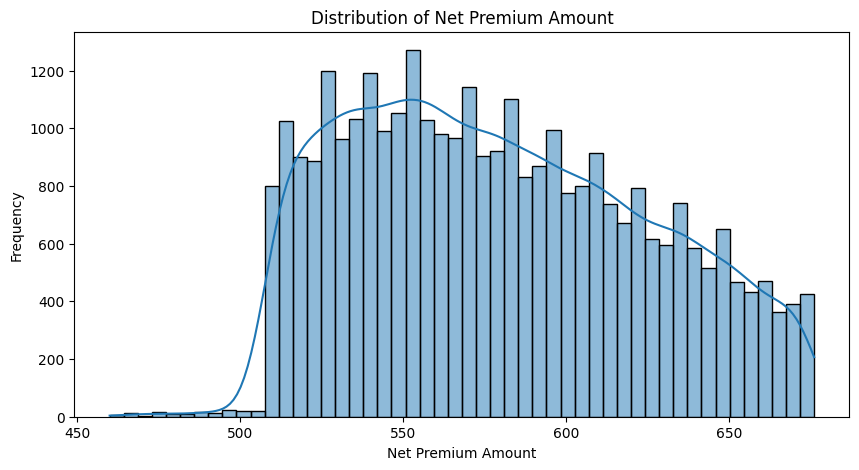

Minimum: 460.0
Maximum: 676.0
Mean: 579.3674383868558
Median: 575.0
Standard Deviation: 44.991023182748144
Skewness: 0.28779611420278234


In [ ]:
# Plot histogram
plt.figure(figsize=(10,5))
sns.histplot(training_df['net_premium_amount'], bins=50, kde=True)
plt.title('Distribution of Net Premium Amount')
plt.xlabel('Net Premium Amount')
plt.ylabel('Frequency')
plt.show()

# Basic stats
premium = training_df['net_premium_amount']
print("Minimum:", premium.min())
print("Maximum:", premium.max())
print("Mean:", premium.mean())
print("Median:", premium.median())
print("Standard Deviation:", premium.std())
print("Skewness:", premium.skew())


In [ ]:
# Filter rows where premium is less than 500
low_premium_df = training_df[training_df['net_premium_amount'] < 500]

# Check how many rows
print("Number of policies with premium < 500:", low_premium_df.shape[0])

# Explore distributions of some key features
print(low_premium_df[['vehicle_value', 'vehicle_weight', 'policy_type', 'seniority']].describe())

# Or see counts for categorical features
print(low_premium_df['policy_type'].value_counts())
print(low_premium_df['payment_method'].value_counts())


Number of policies with premium < 500: 109
       vehicle_value  vehicle_weight  policy_type   seniority
count     109.000000      109.000000   109.000000  109.000000
mean    14089.490826     1024.027523     2.642202    6.486239
std      5786.922036      376.851097     0.687493    6.642477
min       661.110000       55.000000     1.000000    1.000000
25%     10580.000000      946.000000     3.000000    2.000000
50%     14200.000000     1092.000000     3.000000    3.000000
75%     17050.000000     1220.000000     3.000000   10.000000
max     31610.000000     1800.000000     3.000000   35.000000
policy_type
3    83
2    13
1    13
Name: count, dtype: int64
payment_method
0    86
1    23
Name: count, dtype: int64


In [ ]:
# <Student to fill this section and then remove this comment>
target_insights = """The target variable, net_premium_amount, is roughly symmetric and well-distributed, with a mean of 579.37, median of 575, and a standard deviation of 44.99. The slight positive skew (0.29) indicates a few higher values, but overall the distribution is balanced.
Low-premium policies (<500) are rare (109 cases) and mostly involve passenger cars (policy type 3)** with **lighter, lower-value vehicles. Most of these customers pay **annually** and tend to be **less experienced or newer** (low seniority), indicating these policies are lower-risk and lower-cost.
there are no extreme outliers, just a few higher values likely corresponding to higher-risk or larger vehicles.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='target_insights', value=target_insights)

### C.2 Explore Feature of Interest `vehicle_value`

> You can add more cells in this section

In [ ]:
training_df['vehicle_value'].value_counts()


,count
vehicle_value,
18943.00,107
28451.91,82
12500.00,80
19100.00,78
19790.00,76
...,...
43523.11,1
10960.00,1
1219.45,1


In [ ]:
scatter_chart = alt.Chart(training_df).mark_circle(size=60, color='purple', opacity=0.5).encode(
    x='vehicle_value',
    y='net_premium_amount'
)

trend_line = scatter_chart.transform_regression(
    'vehicle_value', 'net_premium_amount'
).mark_line(color='red')

scatter_chart + trend_line


In [ ]:
vehicle_value_bins = pd.cut(training_df['vehicle_value'], bins=10)
summary = training_df.groupby(vehicle_value_bins)['net_premium_amount'].agg(['mean', 'count', 'min', 'max']).reset_index()
print(summary)

In [ ]:
feature_1_insights = """
- vehicle value is strongly correlated with premium (higher car value = higher average premium),
- Most customers have mid-value vehicles:the bulk of customers fall in the 11k–22k range.
- Very few have cars worth above 55k.
- Premiums don’t grow linearly.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.3 Explore Feature of Interest `vehicle_horsepower`

> You can add more cells in this section

In [ ]:
scatter_chart = alt.Chart(training_df).mark_circle(size=60, color='purple', opacity=0.5).encode(
    x='vehicle_horsepower',
    y='net_premium_amount'
)

trend_line = scatter_chart.transform_regression(
    'vehicle_horsepower', 'net_premium_amount'
).mark_line(color='red')

scatter_chart + trend_line


In [ ]:
vehicle_horsepower_bins = pd.cut(training_df['vehicle_horsepower'], bins=10)
summary = training_df.groupby(vehicle_horsepower_bins)['net_premium_amount'].agg(['mean', 'count', 'min', 'max']).reset_index()
print(summary)

In [ ]:
training_df['vehicle_horsepower'].value_counts()

In [ ]:
# Count how many rows have'vehicle_horsepower' = 0
low_value_count = training_df[training_df['vehicle_horsepower'] == 0].shape[0]
print("Number of rows with 'vehicle_horsepower' = 0:", low_value_count)

# See the premium statistics for these rows
low_value_summary = training_df[training_df['vehicle_horsepower'] == 0]['net_premium_amount'].describe()
print(low_value_summary)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.boxplot(training_df['vehicle_horsepower'], vert=False)
plt.xlabel("Horsepower")
plt.title("Boxplot of Vehicle Horsepower")
plt.show()


In [ ]:
Q1 = training_df['vehicle_horsepower'].quantile(0.25)
Q3 = training_df['vehicle_horsepower'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = training_df[(training_df['vehicle_horsepower'] < Q1 - 1.5*IQR) |
                       (training_df['vehicle_horsepower'] > Q3 + 1.5*IQR)]

print("Number of potential outliers:", outliers.shape[0])
outliers[['vehicle_horsepower','net_premium_amount']].sort_values('vehicle_horsepower')


In [ ]:
training_df[(training_df['vehicle_horsepower'] < Q1 - 1.5*IQR)]['vehicle_horsepower'].value_counts()

In [ ]:
# Filter rows with horsepower < 20 and not motorbikes
low_hp_invalid = training_df[(training_df['vehicle_horsepower'] < 20) & (training_df['policy_type'] != 1)]

# See how many rows there are
print("Number of rows with horsepower < 20 for cars/vans/agri:", low_hp_invalid.shape[0])

# Optionally, preview the first few rows
low_hp_invalid[['vehicle_horsepower','policy_type','net_premium_amount','vehicle_value']].head(10)

In [ ]:
# <Student to fill this section and then remove this comment>

feature_2_insights = """
- The more powerful the car, the higher the average premium.
- There are 78 rows with 0 horsepower.Values like 0 hp → clearly invalid, there’s no such vehicle.
- There are 3 rows with that policy_type != 1(not bike) and very low hp (<20) which is unrealistic.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.4 Explore Feature of Interest `vehicle_cylinder`

> You can add more cells in this section

In [ ]:
scatter_chart = alt.Chart(training_df).mark_circle(size=60, color='purple', opacity=0.5).encode(
    x='vehicle_cylinder',
    y='net_premium_amount'
)

trend_line = scatter_chart.transform_regression(
    'vehicle_cylinder', 'net_premium_amount'
).mark_line(color='red')

scatter_chart + trend_line


In [ ]:
vehicle_cylinder_bins = pd.cut(training_df['vehicle_cylinder'], bins=10)
summary = training_df.groupby(vehicle_cylinder_bins)['net_premium_amount'].agg(['mean', 'count', 'min', 'max']).reset_index()
print(summary)

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(training_df['vehicle_cylinder'], vert=False)
plt.xlabel("Cylinder")
plt.title("Boxplot of Vehicle Cylinder")
plt.show()


In [ ]:
training_df[(training_df['vehicle_cylinder'] >4000)]['vehicle_value'].mean()


In [ ]:
training_df['vehicle_value'].describe()


In [ ]:
training_df[training_df['vehicle_cylinder'] < 600]['policy_type'].value_counts()


In [ ]:
feature_3_insights = """
- As cylinder capacity increases, the average premium rises.
- Very small cylinders (43–609 cc) → only 296 rows → mostly for motorbikes.
- Very large cylinders (>4000 cc) → tiny number of rows (4–22) → expensive vehicles.
- Most of the dataset is mid-range → model will mostly learn from that.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

### C.5 Explore Feature of Interest `vehicle_doors`

> You can add more cells related to other feeatures in this section

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x='vehicle_doors', y='net_premium_amount', data=training_df, palette='viridis')
plt.xlabel("Number of Doors")
plt.ylabel("Average Premium")
plt.title("Premium by Vehicle Doors")
plt.show()


In [ ]:
training_df['vehicle_doors'].value_counts()


In [ ]:
training_df.groupby('vehicle_doors')['net_premium_amount'].mean()


In [ ]:
training_df[training_df['vehicle_doors'] == 0]['policy_type'].value_counts()


In [ ]:
# <Student to fill this section and then remove this comment>

feature_16_insights = """
- Most vehicles have 5 doors (20,861), followed by 4 doors.
- Average premium by number of doors. 2 doors is highest. (likely sporty cars)
- 0 doors have lowest premium, which are motorbikes.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_16_insights', value=feature_16_insights)

### C.6 Explore Feature of Interest `vehicle_length`

> You can add more cells related to other feeatures in this section

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='vehicle_length', y='net_premium_amount', data=training_df, hue='policy_type')
plt.xlabel("Vehicle Length (m)")
plt.ylabel("Premium")
plt.title("Premium vs Vehicle Length")
plt.show()


In [ ]:
training_df['vehicle_length'].value_counts()


In [ ]:
length_bins = pd.cut(training_df['vehicle_length'], bins=10)
summary = training_df.groupby(length_bins)['net_premium_amount'].mean().reset_index()
print(summary)


In [ ]:
training_df[training_df['policy_type'] == 1]['vehicle_length']


In [ ]:
feature_17_insights = """
- Most vehicles are between 3.5m and 5.5m, which makes sense for standard cars and vans.
- Average premium increases with vehicle length:
    Short vehicles (~2.5–3m) → ~558
    Medium cars (~4–5m) → 583–601
    Very long vehicles (>6m) → 621–650
- larger vehicles are more expensive to insure.
- Short vehicles like motorbikes have NAN values.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_17_insights', value=feature_17_insights)

### C.7 Explore Feature of Interest `vehicle_weight`

> You can add more cells related to other feeatures in this section

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.scatterplot(x='vehicle_weight', y='net_premium_amount', data=training_df, hue='policy_type')
plt.xlabel("Vehicle Weight (kg)")
plt.ylabel("Premium")
plt.title("Premium vs Vehicle Weight")
plt.show()


In [ ]:
training_df['vehicle_weight'].value_counts()


In [ ]:
weight_bins = pd.cut(training_df['vehicle_weight'], bins=10)
weight_summary = training_df.groupby(weight_bins)['net_premium_amount'].mean().reset_index()
print(weight_summary)


In [ ]:
# Filter vehicles under, say, 300 kg
light_vehicles = training_df[training_df['vehicle_weight'] < 300]
light_vehicles['policy_type'].value_counts()


In [ ]:
# Filter vehicles over, say, 2000 kg
heavy_vehicles = training_df[training_df['vehicle_weight'] > 2000]
heavy_vehicles['policy_type'].value_counts()


In [ ]:
feature_18_insights = """
- Most vehicles are in the ~1100–1350 kg range, typical for passenger cars.
- There are some very light entries (e.g., 55 kg) (motorbikes).
- Generally, heavier vehicles have higher premiums due to repair and replacement costs.
- Weight is a strong predictor of premium.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_18_insights', value=feature_18_insights)

### C.8 Explore Feature of Interest `policy_type`

> You can add more cells related to other feeatures in this section

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=training_df, x='policy_type', bins=4, hue='policy_type', multiple='dodge', shrink=0.8)
plt.xlabel("Policy Type")
plt.ylabel("Number of Customers")
plt.title("Distribution of Policy Type")
plt.xticks([1,2,3,4], ['Motorbike','Van','Passenger Car','Agricultural Vehicle'])
plt.show()


In [ ]:
training_df.groupby('policy_type')['net_premium_amount'].mean()


In [ ]:
feature_7_insights = """
- policy_type is a strong predictor of premium.

- There’s a clear ranking of risk/cost by vehicle type: Motorbike < Passenger Car < Van.

- policy_type = 4 (agricultural vehicles) doesn’t exist
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_7_insights', value=feature_7_insights)

### C.9 Explore Feature of Interest `current_policies_held`

> You can add more cells related to other feeatures in this section

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(training_df['current_policies_held'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("Current Policies Held")
plt.ylabel("Number of Customers")
plt.title("Distribution of Current Policies Held")
plt.show()


In [ ]:
training_df.groupby('current_policies_held')['net_premium_amount'].mean()



In [ ]:
training_df['current_policies_held'].value_counts()


In [ ]:
# <Student to fill this section and then remove this comment>

feature_11_insights = """
- Most customers have 1 policy.
- Extreme values (>10 policies) are rare outliers and could be treated separately or capped.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_11_insights', value=feature_11_insights)

### C.10 Explore Feature of Interest `max_policies_held`

> You can add more cells related to other feeatures in this section

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(training_df['max_policies_held'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel("Max Policies Held")
plt.ylabel("Number of Customers")
plt.title("Distribution of Max Policies Held")
plt.show()


In [ ]:
training_df.groupby('max_policies_held')['net_premium_amount'].mean()


In [ ]:
training_df['max_policies_held'].value_counts()


In [ ]:
feature_12_insights = """
- Most customers historically had 1 policy (16,692 customers) or 2 policies.
- Extreme values (>10 policies) are very rare.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_12_insights', value=feature_12_insights)

### C.11 Explore Feature of Interest `max_products_held`

> You can add more cells related to other feeatures in this section

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='max_products_held', data=training_df, palette='pastel')
plt.xlabel("Max Products Held")
plt.ylabel("Number of Customers")
plt.title("Distribution of Max Products Held")
plt.show()


In [ ]:
training_df.groupby('max_products_held')['net_premium_amount'].mean()


In [ ]:
training_df['max_products_held'].value_counts()


In [ ]:
feature_13_insights = """
- Most customers have 1 product.
- Very few customers have 2, 3, or 4 products.
- Average premiums show slight variation.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_13_insights', value=feature_13_insights)

### C.12 Explore Feature of Interest `seniority`

> You can add more cells related to other feeatures in this section

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(training_df['seniority'], bins=40, color='lightgreen', edgecolor='black')
plt.xlabel("Seniority (years)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Seniority")
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='seniority', y='net_premium_amount', data=training_df, alpha=0.5)
plt.xlabel("Seniority (years)")
plt.ylabel("Net Premium Amount")
plt.title("Premium vs Customer Seniority")
plt.show()


In [ ]:
seniority_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50]
training_df['seniority_bin'] = pd.cut(training_df['seniority'], bins=seniority_bins)
seniority_summary = training_df.groupby('seniority_bin')['net_premium_amount'].agg(['mean', 'count', 'min', 'max']).reset_index()
seniority_summary


In [ ]:
# <Student to fill this section and then remove this comment>

feature_9_insights = """
- Premium decreases gradually as seniority increases.

- Majority of customers are 0–5 years.

- Distribution of Customer Seniority is right skewed.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_9_insights', value=feature_9_insights)

### C.13 Explore Feature of Interest `total_claims_number_in_history`

> You can add more cells related to other feeatures in this section

In [ ]:
scatter_chart = alt.Chart(training_df).mark_circle(size=60, color='purple', opacity=0.5).encode(
    x='total_claims_number_in_history',
    y='net_premium_amount'
)

trend_line = scatter_chart.transform_regression(
    'total_claims_number_in_history', 'net_premium_amount'
).mark_line(color='red')

scatter_chart + trend_line


In [ ]:

total_claims_number_in_history_bins = pd.cut(training_df['total_claims_number_in_history'], bins=10)
summary = training_df.groupby(total_claims_number_in_history_bins)['net_premium_amount'].agg(['mean', 'count', 'min', 'max']).reset_index()

print(summary)

In [ ]:

plt.figure(figsize=(10,5))
plt.boxplot(training_df['total_claims_number_in_history'], vert=False)
plt.xlabel("Total claims")
plt.title("Boxplot of Total claims")
plt.show()


In [ ]:
# <Student to fill this section and then remove this comment>

feature_5_insights = """
- As the total number of claims increases, the average premium also rises.
- Most customers have few claims.
- Very few customers have many claims.
- The data is heavily skewed toward low claim numbers, so binning or transforming for modeling is a good method.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_5_insights', value=feature_5_insights)

### C.14 Explore Feature of Interest `total_claims_cost_in_current_year`

> You can add more cells related to other feeatures in this section

In [ ]:
scatter_chart = alt.Chart(training_df).mark_circle(size=60, color='purple', opacity=0.5).encode(
    x='total_claims_cost_in_current_year',
    y='net_premium_amount'
)

trend_line = scatter_chart.transform_regression(
    'total_claims_cost_in_current_year', 'net_premium_amount'
).mark_line(color='red')

scatter_chart + trend_line


In [ ]:

total_claims_cost_in_current_year_bins = pd.cut(training_df['total_claims_cost_in_current_year'], bins=10)
summary = training_df.groupby(total_claims_cost_in_current_year_bins)['net_premium_amount'].agg(['mean', 'count', 'min', 'max']).reset_index()

print(summary)

In [ ]:

plt.figure(figsize=(10,5))
plt.boxplot(training_df['total_claims_cost_in_current_year'], vert=False)
plt.xlabel("Total claims cost")
plt.title("Boxplot of Total claims cost")
plt.show()


In [ ]:
# <Student to fill this section and then remove this comment>

feature_6_insights = """
- total_claims_cost_in_current_year is a strong risk indicator for premium.

- Distribution is heavily right-skewed, so → log-transform or bin extreme values before modeling.

- Majority of customers are low-cost claimers → model needs to handle class imbalance carefully.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_6_insights', value=feature_6_insights)

### C.15 Explore Feature of Interest `total_claims_number_in_current_year`

> You can add more cells related to other feeatures in this section

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(x='total_claims_number_in_current_year', data=training_df, palette='muted')
plt.xlabel("Total Claims in Current Year")
plt.ylabel("Number of Customers")
plt.title("Distribution of Claims in Current Year")
plt.show()


In [ ]:
training_df.groupby('total_claims_number_in_current_year')['net_premium_amount'].mean()


In [ ]:
training_df['total_claims_number_in_current_year'].value_counts()


In [ ]:
feature_14_insights = """
- Most customers (28,587, ~89%) have 0 claims in the current year.
- Customers with more than 5 claims are very rare (fewer than 100).
- Average premium increases with number of claims
- Customers without claims are safer, paying lower premiums.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_14_insights', value=feature_14_insights)

### C.16 Explore Feature of Interest `total_claims_number_ratio`

> You can add more cells related to other feeatures in this section

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(training_df['total_claims_number_ratio'], bins=20, color='teal', edgecolor='black')
plt.xlabel("Claims Number Ratio")
plt.ylabel("Number of Customers")
plt.title("Distribution of Claims Ratio")
plt.show()


In [ ]:
ratio_bins = pd.cut(training_df['total_claims_number_ratio'], bins=10)
summary = training_df.groupby(ratio_bins)['net_premium_amount'].mean().reset_index()
print(summary)


In [ ]:
training_df['total_claims_number_ratio'].value_counts()


In [ ]:
feature_15_insights = """
- Most customers have a ratio of 0 (16,075 customers, ~50%), meaning no claims per year.
- Smaller groups have fractional ratios like 0.33, 0.5, or 1, reflecting occasional claimers.
- Average premium increases slightly with moderate ratios.
- Claims frequency per year is a strong risk indicator.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_15_insights', value=feature_15_insights)

In [ ]:


training_df.isna().sum()



### C.17 Explore Feature of Interest `second_driver`

> You can add more cells related to other feeatures in this section

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(training_df, x='second_driver', bins=2, shrink=0.8, color='skyblue', edgecolor='black')
plt.xticks([0,1], ['Single Driver','Multiple Drivers'])
plt.xlabel("Number of Regular Drivers")
plt.ylabel("Number of Customers")
plt.title("Distribution of Single vs Multiple Drivers")
plt.show()


In [ ]:
training_df['second_driver'].value_counts()


In [ ]:
training_df.groupby('second_driver')['net_premium_amount'].mean()


In [ ]:
# <Student to fill this section and then remove this comment>

feature_8_insights = """
- Most policies have only one declared driver

- Multiple drivers slightly increase premiums.

- second_driver is a small but meaningful predictor of premium.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_8_insights', value=feature_8_insights)

### C.18 Explore Feature of Interest `payment_method`

> You can add more cells related to other feeatures in this section

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='payment_method', data=training_df, palette='pastel')
plt.xticks([0,1], ['Annual','Semi-Annual'])
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.title("Distribution of Payment Methods")
plt.show()


In [ ]:
training_df.groupby('payment_method')['net_premium_amount'].mean()


In [ ]:
training_df['payment_method'].value_counts()


In [ ]:
feature_10_insights = """
- payment_method is a moderate predictor of premium.
- cusotmers mostly pay annually.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_10_insights', value=feature_10_insights)